<a href="https://colab.research.google.com/github/manav616/ADS_EXPS/blob/main/ADS6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import sys
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)


In [ ]:
data = pd.read_csv('Housing.csv')
data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
print("\nDataFrame info:")
print(data.info())


DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


**KNN**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Standardize the numerical columns
scaler = StandardScaler()
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
data_scaled = scaler.fit_transform(data[numerical_cols])

# Outlier detection using KNN
# Compute distances
nbrs = NearestNeighbors(n_neighbors=5, algorithm='auto').fit(data_scaled)
distances, indices = nbrs.kneighbors(data_scaled)

# Set your threshold for outlier detection
threshold = 2.0

# Identify outliers
outlier_indices_knn = []
for i, distances_row in enumerate(distances):
    if max(distances_row) > threshold:
        outlier_indices_knn.append(i)

print("Outliers detected using KNN:")
print(outlier_indices_knn)

Outliers detected using KNN:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 28, 33, 34, 47, 56, 69, 89, 112, 125, 129, 153, 195, 220, 247, 290, 356, 395, 403, 499]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data.mainroad=le.fit_transform(data.mainroad)
data.guestroom=le.fit_transform(data.guestroom)
data.basement=le.fit_transform(data.basement)
data.hotwaterheating=le.fit_transform(data.hotwaterheating)
data.airconditioning=le.fit_transform(data.airconditioning)
data.prefarea=le.fit_transform(data.prefarea)
data.furnishingstatus=le.fit_transform(data.furnishingstatus)

In [ ]:
features,target=data.drop(["price"],axis='columns'),data["price"]

**Linear Regression**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
model.score(x_train,y_train)


0.7029111522628887

In [ ]:
pred=model.predict(x_train)
pred_actual=pd.DataFrame({"Pred":pred,"Actual":y_train})
pred_actual.head()

,Pred,Actual
418,4.751213e+06,3360000
231,3.780604e+06,4690000
44,7.472305e+06,7560000
335,4.934277e+06,3920000
532,2.063518e+06,2135000


In [ ]:
error=y_train-pred
np.mean(error)

6.280019195801621e-10

(array([  9.,  35., 110., 150.,  82.,  29.,  13.,   3.,   3.,   2.]),
 array([-2699942.43972843, -1936401.7202846 , -1172861.00084077,
         -409320.28139694,   354220.43804689,  1117761.15749073,
         1881301.87693456,  2644842.59637839,  3408383.31582222,
         4171924.03526605,  4935464.75470988]),
 <BarContainer object of 10 artists>)

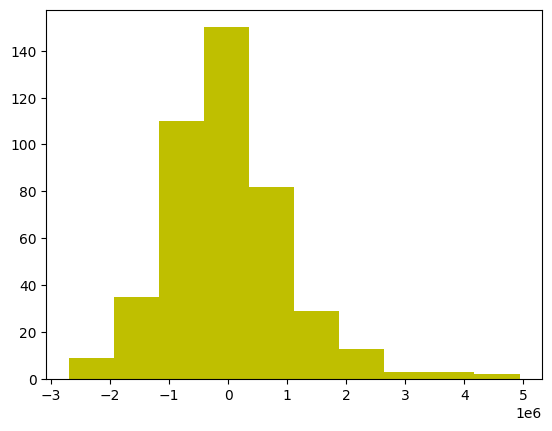

In [ ]:
plt.hist(error,color='y')

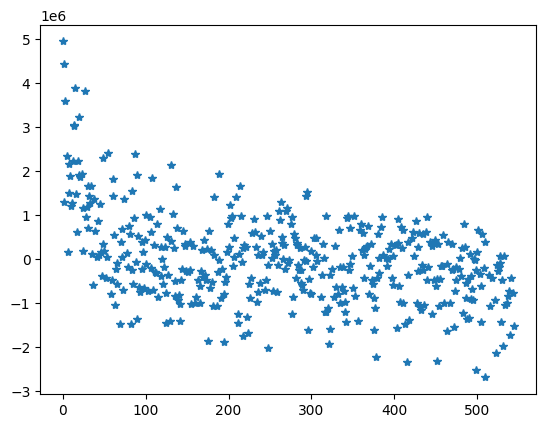

In [ ]:
plt.plot(error,"*")


In [ ]:
x=np.array(pred_actual)


In [ ]:
from sklearn.covariance import EllipticEnvelope
elpenv=EllipticEnvelope(contamination=0.05)
pred=elpenv.fit_predict(x)
pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [ ]:
l1=list(pred)
l1.count(-1) #count of outliers

22

In [ ]:
index_for_outlier=np.where(pred==-1)
print("Outlier indexes are: ",index_for_outlier)
print()


Outlier indexes are:  (array([ 11,  31,  47,  54,  80,  82,  94, 140, 141, 149, 151, 159, 177,
       244, 247, 255, 266, 298, 363, 372, 410, 422]),)



In [ ]:
outlier_values=x[index_for_outlier]
outlier_values

array([[ 7727152.20086568,  9870000.        ],
       [ 8600956.64142176,  9800000.        ],
       [ 9988266.88072781, 10150000.        ],
       [ 4587775.37714547,  8400000.        ],
       [ 6722876.89791728,  8645000.        ],
       [ 7627947.46546747,  9100000.        ],
       [ 6820893.50670192,  8680000.        ],
       [ 6675020.60838624,  8890000.        ],
       [ 8414605.40908769,  9681000.        ],
       [ 8631103.9700532 , 12215000.        ],
       [ 7833874.92740536, 12250000.        ],
       [ 6191290.39861602,  9240000.        ],
       [ 7094277.53510171,  9310000.        ],
       [ 8508828.7406145 , 10850000.        ],
       [ 5213574.69852774,  9100000.        ],
       [ 7917873.47985993,  9800000.        ],
       [ 8648764.49128379, 10150000.        ],
       [ 8364535.24529012, 13300000.        ],
       [ 6234606.17836538,  9240000.        ],
       [10966593.10161016, 12250000.        ],
       [ 6962625.71992999,  8855000.        ],
       [ 5520

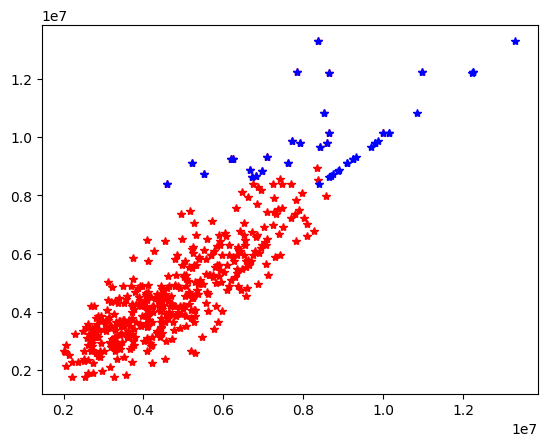

In [ ]:
plt.plot(x[:,0],x[:,1],"*",color="r")
plt.plot(outlier_values,outlier_values[:,1],"*",color="b")

